# Prediction of IRIS Species using Decision Tree Classifier - GRIP @ SPARKS FOUNDATION
   ## By <i>- Praneeth Aluru</i>

### **Importing the requied packages** 

In [ ]:
## Importing the required packages

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from IPython.display import  Image
from sklearn.tree import  export_graphviz
import pydot
import graphviz

### **Readind the csv file**

In [ ]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **Understanding the shape of the data**

In [ ]:
print("The shape of the data is:",data.shape)
print("Number of rows:",data.shape[0])
print("Number of columns:",data.shape[1])

The shape of the data is: (150, 6)
Number of rows: 150
Number of columns: 6


### **Knowing about the unique classes to be predicted**

---



In [ ]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

### **Sepal_Length(in cms) Distribution**

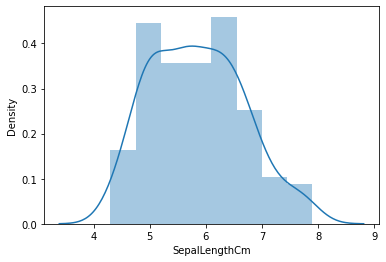

In [ ]:
sns.distplot(data['SepalLengthCm'])

### **Sepal_Width(in cms) Distribution**

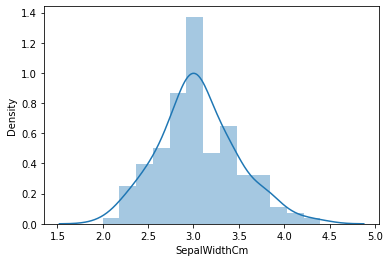

In [ ]:
sns.distplot(data['SepalWidthCm'])

### **Petal_Length(in cms) Distribution**

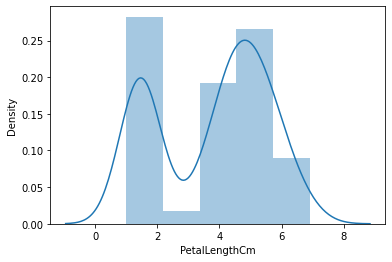

In [ ]:
sns.distplot(data['PetalLengthCm'])

### **Petal_Width(in cms) Distribution**

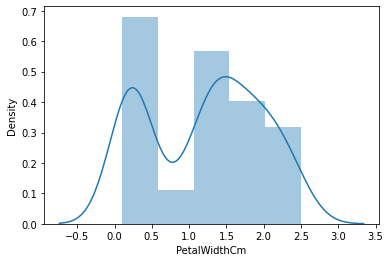

In [ ]:
sns.distplot(data['PetalWidthCm'])

### **Getting statistical insights of the features**

In [ ]:
data1 = pd.read_csv('Iris.csv',index_col=0)

In [ ]:
data1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Pair plot of the data**

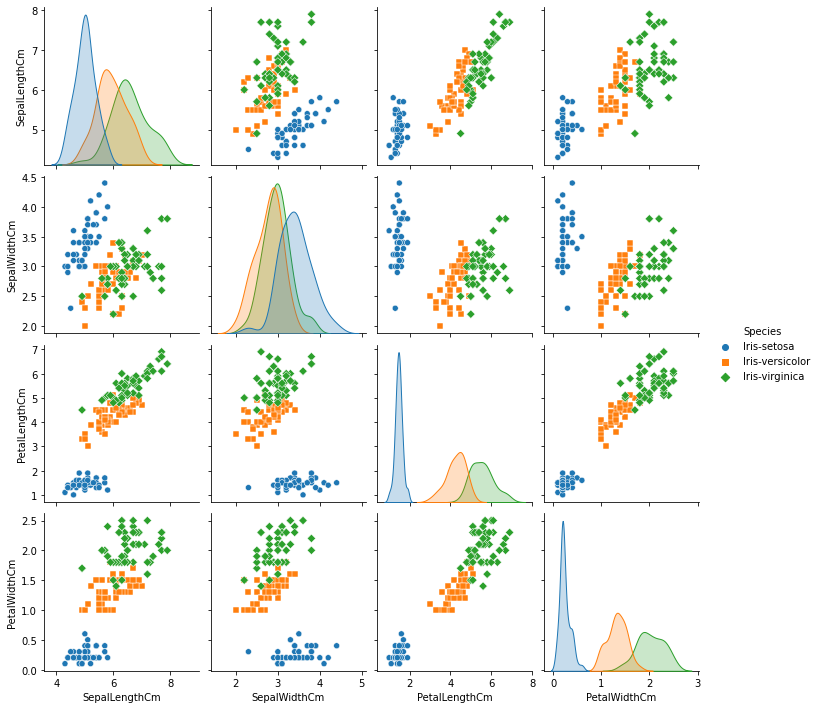

In [ ]:
sns.pairplot(data1, hue="Species", markers=["o", "s", "D"])

In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### **Creating X and y Data**

In [ ]:
y = data['Species']
X = data.drop(['Id','Species'],axis=1)

In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **Train_Test_Split to create Train,CV,Test data**

In [ ]:
X_train,X_cv,y_train,y_cv = train_test_split(X,y,train_size = 0.8,random_state = 0)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train)

### **Shapes of Train,CV,Test data**

In [ ]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(90, 4)
(30, 4)
(30, 4)


### **Scaling the data between 0,1**

In [ ]:
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_cv = ms.transform(X_cv)
X_test = ms.transform(X_test)

### **Label Encoding the target data**

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_cv=le.transform(y_cv)
y_test = le.transform(y_test)

### **Hyperparameter Tuning and Fitting the data**

In [ ]:
param_dist = { "max_depth": [2,3,4,5,6,7],
              "max_features": randint(1, 3),
              "min_samples_leaf": randint(1, 3)
              }

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
tree_cv = RandomizedSearchCV(clf, param_dist, cv=4)

In [ ]:
tree_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

### **Getting best parameters and score**

In [ ]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 2}
Best score is 0.9229249011857708


### **Fitting with the best parameters**

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 6, max_features= 2, min_samples_leaf= 2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
data1.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### **Getting Important features with their scores**

In [ ]:
importances = pd.DataFrame({'feature':['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [ ]:
importances

,feature,importance
2,PetalLengthCm,0.529
3,PetalWidthCm,0.441
0,SepalLengthCm,0.026
1,SepalWidthCm,0.003


### **Predicting the Train,CV and Test data**

In [ ]:
tr = clf.predict(X_train)
cv = clf.predict(X_cv)
te = clf.predict(X_test)

In [ ]:
data1.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data1 = data1.drop(['Species'],axis=1)
data1.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [ ]:
import pathlib
pathlib.Path().absolute()

PosixPath('/content')

## **Visualization of Decision Tree**

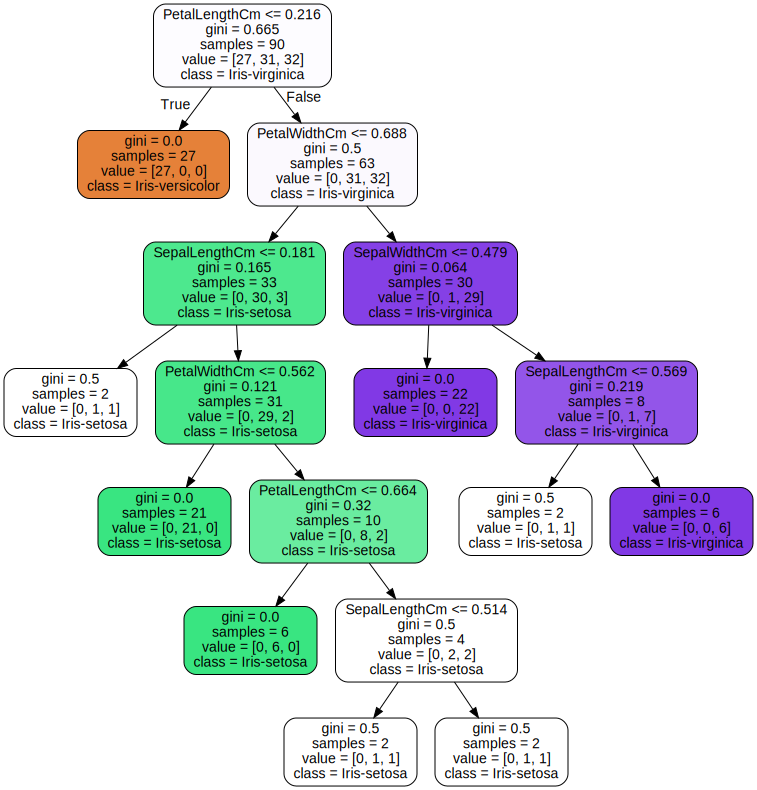

In [ ]:
# https://stackoverflow.com/a/58956293/12877038

target = ['Iris-versicolor','Iris-setosa','Iris-virginica']
dot_data=tree.export_graphviz(clf,out_file=None,class_names=target,rounded = True, proportion = False,filled=True,feature_names=X.columns)
graph=graphviz.Source(dot_data)
graph

In [ ]:
graph.format = "png"
graph.render("DecisionTreeGRIP_colab_image")

'/content/drive/MyDrive/DecisionTreeGRIP/DecisionTreeGRIP_colab_image.png'

### **Micro-F1 Scores**

In [ ]:
from sklearn.metrics import f1_score
print("The train F1-Score is:",f1_score(y_train,tr,average='micro'))
print("The cv F1-Score is:",f1_score(y_cv,cv,average='micro'))
print("The test F1-Score is:",f1_score(y_test,te,average='micro'))

The train F1-Score is: 0.9555555555555556
The cv F1-Score is: 0.9333333333333333
The test F1-Score is: 0.9333333333333333


**By seeing the cv and test F1-Score, we can say that our classifier has predicted very much well. We have used cv to reduce the problem of data leakage. Our model is not even over fitting. Hence, we got a good model to predict the iris flowers based on the given features.**